In [1]:
# imports and setup
%matplotlib inline

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('precision',4)
pd.set_option('display.max_rows',12)
pd.set_option('display.max_columns',12)
pd.set_option('display.float_format','{:20,.5f}'.format)

plt.style.use('seaborn')

In [38]:
weatherHistory = pd.read_csv('datasets/weatherHistory.csv')
weatherHistory = weatherHistory.dropna()
weatherHistory = weatherHistory.drop_duplicates()
weatherHistory

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.47222,7.38889,0.89000,14.11970,251.00000,15.82630,0.00000,"1,015.13000",Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.35556,7.22778,0.86000,14.26460,259.00000,15.82630,0.00000,"1,015.63000",Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.37778,9.37778,0.89000,3.92840,204.00000,14.95690,0.00000,"1,015.94000",Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.28889,5.94444,0.83000,14.10360,269.00000,15.82630,0.00000,"1,016.41000",Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.75556,6.97778,0.83000,11.04460,259.00000,15.82630,0.00000,"1,016.51000",Partly cloudy throughout the day.
...,...,...,...,...,...,...,...,...,...,...,...,...
96448,2016-09-09 19:00:00.000 +0200,Partly Cloudy,rain,26.01667,26.01667,0.43000,10.99630,31.00000,16.10000,0.00000,"1,014.36000",Partly cloudy starting in the morning.
96449,2016-09-09 20:00:00.000 +0200,Partly Cloudy,rain,24.58333,24.58333,0.48000,10.09470,20.00000,15.55260,0.00000,"1,015.16000",Partly cloudy starting in the morning.
96450,2016-09-09 21:00:00.000 +0200,Partly Cloudy,rain,22.03889,22.03889,0.56000,8.98380,30.00000,16.10000,0.00000,"1,015.66000",Partly cloudy starting in the morning.
96451,2016-09-09 22:00:00.000 +0200,Partly Cloudy,rain,21.52222,21.52222,0.60000,10.52940,20.00000,16.10000,0.00000,"1,015.95000",Partly cloudy starting in the morning.


In [39]:
weatherHistory.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95912 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            95912 non-null  object 
 1   Summary                   95912 non-null  object 
 2   Precip Type               95912 non-null  object 
 3   Temperature (C)           95912 non-null  float64
 4   Apparent Temperature (C)  95912 non-null  float64
 5   Humidity                  95912 non-null  float64
 6   Wind Speed (km/h)         95912 non-null  float64
 7   Wind Bearing (degrees)    95912 non-null  float64
 8   Visibility (km)           95912 non-null  float64
 9   Loud Cover                95912 non-null  float64
 10  Pressure (millibars)      95912 non-null  float64
 11  Daily Summary             95912 non-null  object 
dtypes: float64(8), object(4)
memory usage: 9.5+ MB


In [40]:
weatherHistory.columns

Index(['Formatted Date', 'Summary', 'Precip Type', 'Temperature (C)',
       'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover',
       'Pressure (millibars)', 'Daily Summary'],
      dtype='object')

In [41]:
weatherHistory.shape

(95912, 12)

In [42]:
weatherHistory.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
count,"95,912.00000","95,912.00000","95,912.00000","95,912.00000","95,912.00000","95,912.00000","95,912.00000","95,912.00000"
mean,11.93797,10.85919,0.73484,10.80676,187.50699,10.36231,0.00000,"1,003.14696"
std,9.56962,10.71671,0.19572,6.92050,107.37831,4.17420,0.00000,117.29148
min,-21.82222,-27.71667,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
25%,4.59444,2.27222,0.60000,5.81210,116.00000,8.35590,0.00000,"1,011.89000"
50%,12.02222,12.02222,0.78000,9.93370,180.00000,10.04640,0.00000,"1,016.42000"
75%,18.84444,18.84444,0.89000,14.13580,290.00000,14.81200,0.00000,"1,021.05000"
max,39.90556,39.34444,1.00000,63.85260,359.00000,16.10000,0.00000,"1,046.38000"


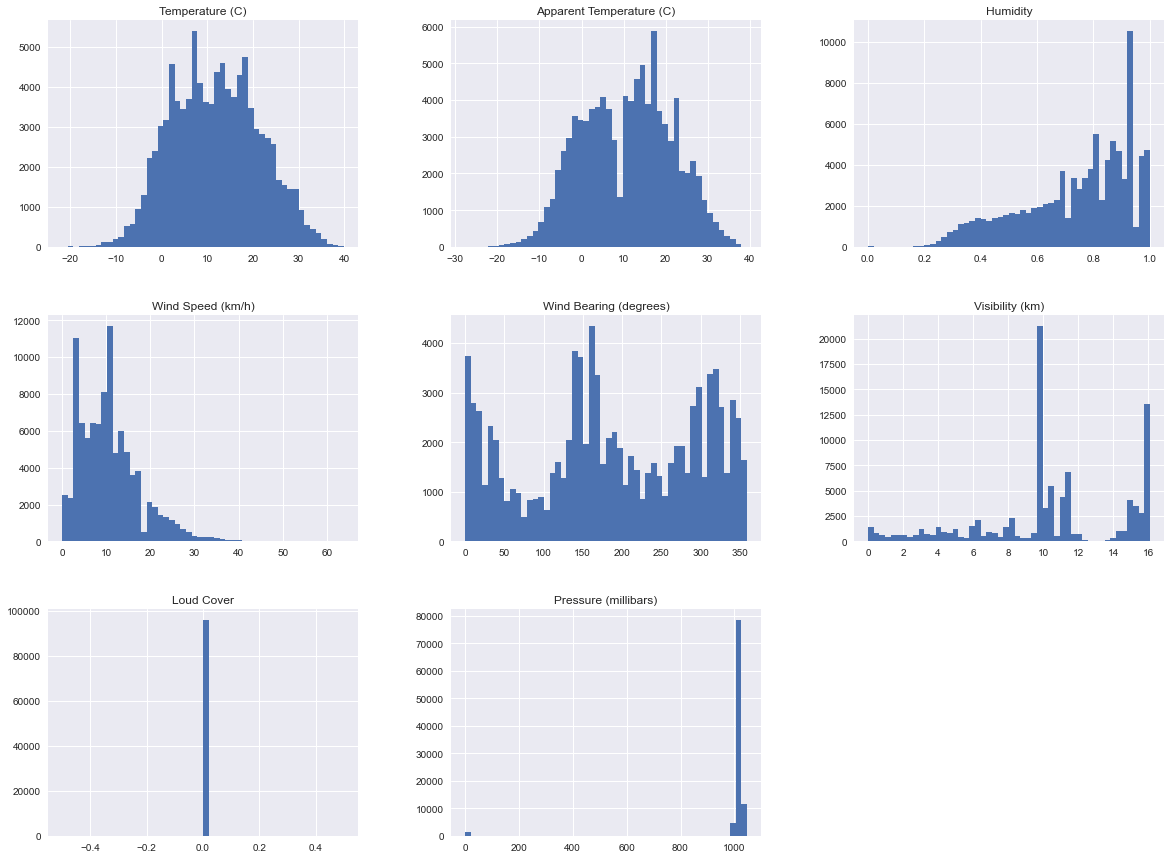

In [43]:
weatherHistory.hist(bins=50, figsize=(20,15))
plt.show()

In [44]:
weatherHistory.corr()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
Temperature (C),1.00000,0.99263,-0.63222,0.00866,0.02984,0.39381,NaN,-0.00529
Apparent Temperature (C),0.99263,1.00000,-0.60246,-0.05706,0.02885,0.38268,NaN,-0.00007
Humidity,-0.63222,-0.60246,1.00000,-0.22470,0.00077,-0.37062,NaN,0.00538
Wind Speed (km/h),0.00866,-0.05706,-0.22470,1.00000,0.10448,0.10085,NaN,-0.04943
Wind Bearing (degrees),0.02984,0.02885,0.00077,0.10448,1.00000,0.04889,NaN,-0.01164
Visibility (km),0.39381,0.38268,-0.37062,0.10085,0.04889,1.00000,NaN,0.06101
Loud Cover,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Pressure (millibars),-0.00529,-0.00007,0.00538,-0.04943,-0.01164,0.06101,NaN,1.00000


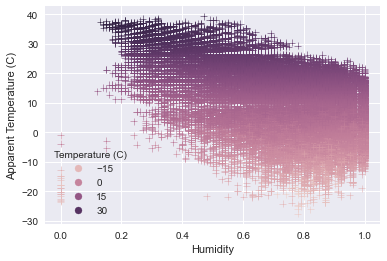

In [56]:
sns.scatterplot(x='Humidity',y='Apparent Temperature (C)',hue='Temperature (C)',data=weatherHistory,marker="+",color="g");

In [64]:
ols_sm = linear_model.LinearRegression(fit_intercept=True)

# predictors & dependent var
X_train = weatherHistory[['Temperature (C)', 'Humidity']]
y_true = weatherHistory['Apparent Temperature (C)']

ols_sm = sm.OLS(y_true, sm.add_constant(X_train))

ols_sm_results = ols_sm.fit()
ols_sm_results.summary()

/Users/baejuhyeon/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     Apparent Temperature (C)   R-squared:                       0.986
Model:                                  OLS   Adj. R-squared:                  0.986
Method:                       Least Squares   F-statistic:                 3.471e+06
Date:                      Sun, 15 May 2022   Prob (F-statistic):               0.00
Time:                              18:16:32   Log-Likelihood:            -1.5757e+05
No. Observations:                     95912   AIC:                         3.152e+05
Df Residuals:                         95909   BIC:                         3.152e+05
Df Model:                                 2                                         
Covariance Type:                  nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -4.4477      0.025   -181.148      0.000      -4.496      -4.400
Temperature (C)     1.1412      0.001   2094.637      0.000       1.140       1.142
Humidity            2.2902      0.027     85.967      0.000       2.238       2.342
==============================================================================
Omnibus:                     2036.455   Durbin-Watson:                   0.407
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3725.182
Skew:                          -0.162   Prob(JB):                         0.00
Kurtosis:                       3.909   Cond. No.                         136.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [73]:
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.model_selection import train_test_split

lm = LinearRegression(fit_intercept=True)

X, y = weatherHistory.loc[:,['Temperature (C)', 'Humidity']],weatherHistory['Apparent Temperature (C)']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.5,random_state=42)

lm_fit = lm.fit(X_train,y_train)

lm_predict = lm_fit.predict(X_test)

print(pd.Series(lm_fit.coef_, index=X.columns))
print('MSE: ',mean_squared_error(y_test,lm_predict))

Temperature (C)                1.14112
Humidity                       2.30766
dtype: float64
MSE:  1.5643663227967226


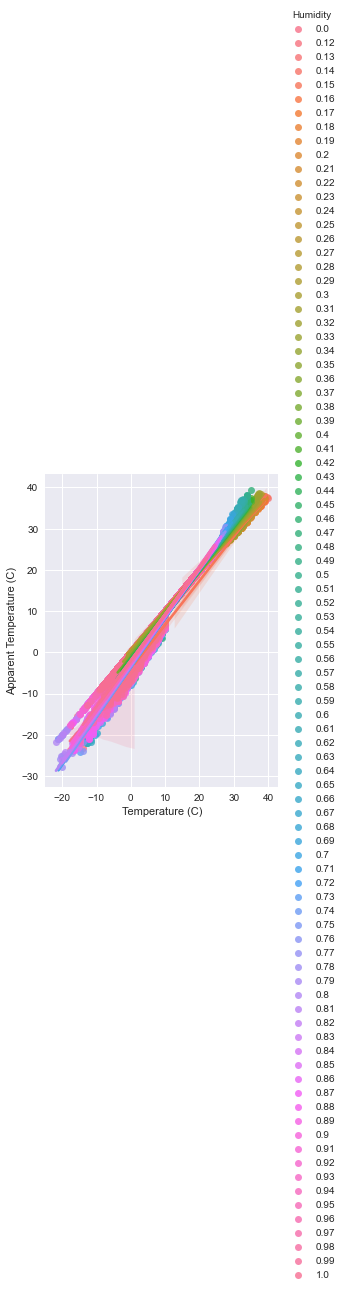

In [91]:
sns.pairplot(weatherHistory, x_vars=['Temperature (C)'], y_vars=['Apparent Temperature (C)'],
             hue="Humidity", height=5, aspect=.8, kind="reg");